**By:** Reynaldo Ace Bonita Jr. 

# Model Complexity and Model Selection - KNN Regressor


## KNN Regressor

In this section, I implemented a KNN regressor function `knn(train.data, train.label,test.data,K=3)`. By taking a training data and their labels consisting of continuous values, K as the number of neighbors, and the test set, the function returns the average values of the neighborhood as the regressed value. Similar to the tutorial for the KNN classifier, I used the Eucledian distance to determine the nearest neighbors. 

Majority of my code is adapted from the KNN classifier tutuorial and the major differences are: 
- returning the average of the values in the neighborhood
- calculating the error by the sum of squares between the test labels and the prediction

Here is a summary of my steps:
- load the dataset
- compute the distances between points
- identify nearest neighbors
- adapt the KNN classifier tutorial code to get the mean of the nearest neighbors
- ran the KNN classifer repeatedly by varying the K from 1 to 20
- calculate the sum of squares error between the test labels and the prediction

My findings are as follows:
- The optimum value of K is 11 because it seems to be the most ideal balance between the training error (61.361702) and the test error (38.12096). It is the point where the testing error is lowest before it increases as K increases. K below 11 overfits the training data and performs poorly in the test dataset. K above that underfits both the training data and test data. 
- In general, as K increases, the complexity of the KNN classifier increases too. As K increases, the training error increases. This is so because a model which is less complex tends to overfit the training dataset and performs poorly when it used on the test set.  As K increases, the testing error decreases until it reaches a mininum and begins to increase as the model becomes too general and fits poorly with the data. 


### Loading the packages needed

In [28]:
library(reshape2)
library(ggplot2)
library(corrplot)
options(warn=-1)

### Loading the dataset

In [2]:
train.data <- read.csv(file="Task1A_train.csv", header=TRUE, sep=",")

train.label <- as.data.frame(train.data[,2])
train.data <- as.data.frame(train.data[,1])
colnames(train.label)[1] <- "y"
colnames(train.data)[1] <- "x1"

test.data <- read.csv(file="Task1A_test.csv", header=TRUE, sep=",")
test.label <- as.data.frame(test.data[,2])
test.data <- as.data.frame(test.data[,1])
colnames(test.label)[1] <- "y"
colnames(test.data)[1] <- "x1"

## Checking if they're loaded properly
#head(train.data,10)
#head(train.label)
#dim(train.data)

## A bit of exploration
#qplot(test.data$x1, test.label$y)
#qplot(train.data$x1, train.label$y)

### KNN Regressor

In [3]:
# Implementation of the KNN regression. Adapted from the tutorial activity 1.1
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    # Counting the number of train and test samples
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    
    # Computes the distance between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    # print (dist)
    
    ## for each test sample...
    for (i in 1:test.len){
        
        ### ...find its K nearest neighbours from training sampels using the eucledian distance
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        #print("nn=")
        #print (nn)
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i,] <- mean(train.label[nn,])
        #test.label[nn]
        #train.label[nn]
        #print(train.label[nn,])
    }
    
    ## return the regression value computed as output
    return (test.label)
}

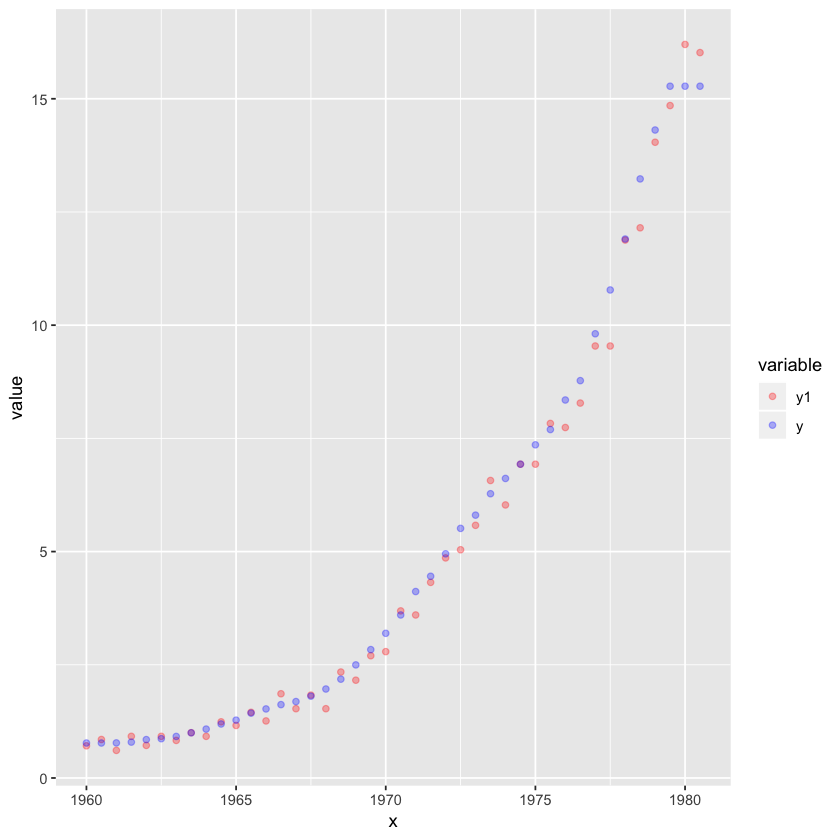

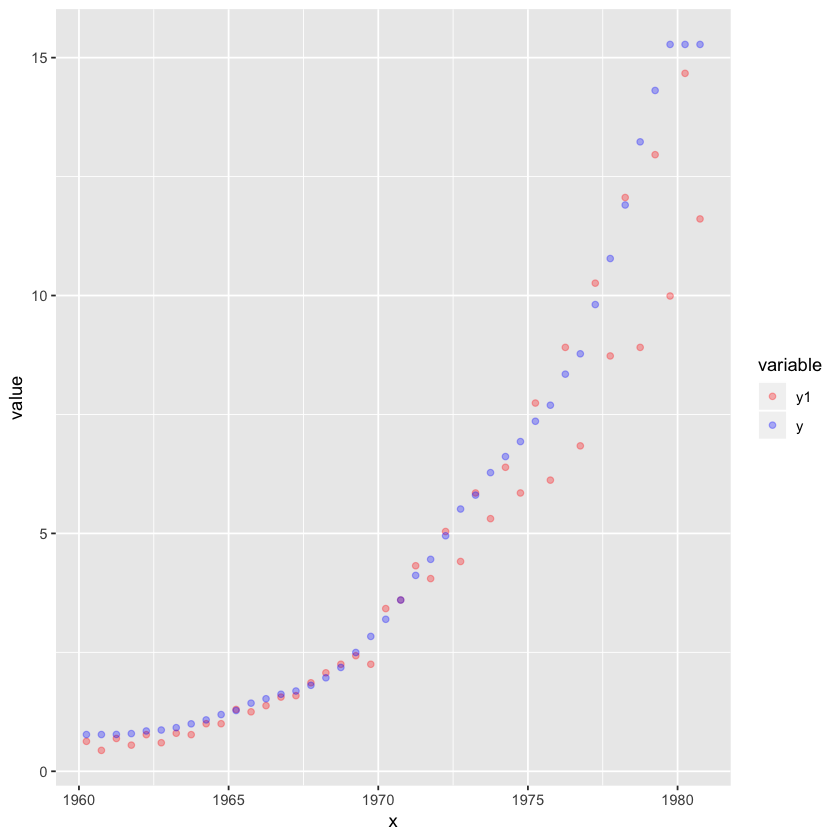

In [4]:
## Visualizing the actual test labels and the results of the KNN regression

# For the train set
d <- data.frame(x=train.data$x1, y1=train.label$y,y2=knn(train.data, train.label, test.data, K=4))
dat.m <- melt(d, id.vars = "x")

ggplot(dat.m, aes(x, value, colour = variable)) +
  geom_point(alpha=0.3) +
  scale_colour_manual(values = c("red", "blue"))

# For the test set
d <- data.frame(x=test.data$x1, y1=test.label$y,y2=knn(train.data, train.label, test.data, K=4))

dat.m <- melt(d, id.vars = "x")
ggplot(dat.m, aes(x, value, colour = variable)) +
  geom_point(alpha=0.3) +
  scale_colour_manual(values = c("red", "blue"))

## Testing the KNN regression
#knn(train.data, train.label, test.data, K=4)

### Calculating the regression error

In [24]:
## Creates a dataframe of the error rate for each case
miss <- data.frame('K'=1:42, 'train'=rep(0,42), 'test'=rep(0,42))

## Calculates the error rate for the train and test data
for (k in 1:42){
    miss[k,'train'] <- sum((knn(train.data, train.label, train.data, K=k)-train.label)^2)
    miss[k,'test'] <-  sum((knn(train.data, train.label, test.data, K=k)-test.label)^2)
}
print(miss)


    K      train      test
1   1   0.000000  70.96840
2   2   5.136275  89.32017
3   3   4.046322  71.19546
4   4   6.293200  77.82020
5   5   6.645220  57.96862
6   6  11.895081  61.86421
7   7  18.549582  45.32947
8   8  26.515105  49.42356
9   9  37.705596  40.09249
10 10  48.706555  43.93391
11 11  61.361702  38.12096
12 12  72.859860  46.58471
13 13  88.418502  44.06896
14 14 100.927582  53.71792
15 15 115.592433  52.41715
16 16 127.624441  64.49274
17 17 145.955111  65.73517
18 18 159.028193  77.51863
19 19 177.979299  80.52259
20 20 193.734808  95.63252
21 21 213.510797 100.96173
22 22 231.506675 117.11031
23 23 254.510464 125.25459
24 24 274.167107 144.42468
25 25 298.543135 155.22768
26 26 320.498418 176.25285
27 27 347.245641 189.57546
28 28 370.288272 213.07501
29 29 396.936157 227.53485
30 30 421.233973 252.22809
31 31 450.929152 269.47511
32 32 476.753697 296.47454
33 33 508.308664 316.17085
34 34 535.927207 344.23960
35 35 571.494821 368.79813
36 36 602.127023 400.10364
3

### Visualizing the regression error

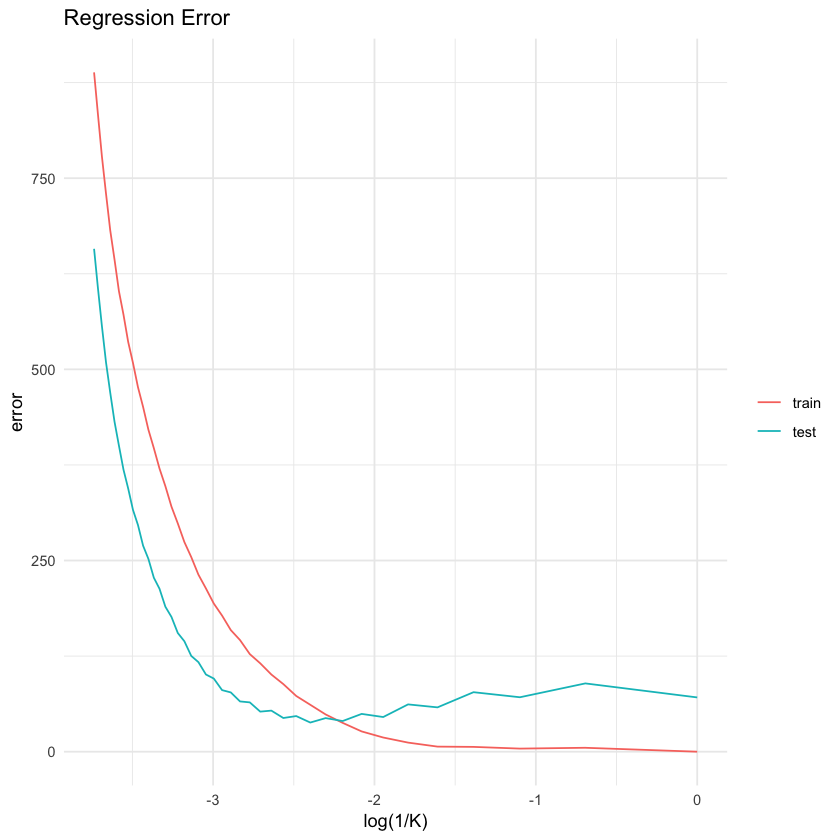

In [23]:
# Plot training and testing error in relation to log(1/K)
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=log(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Regression Error")


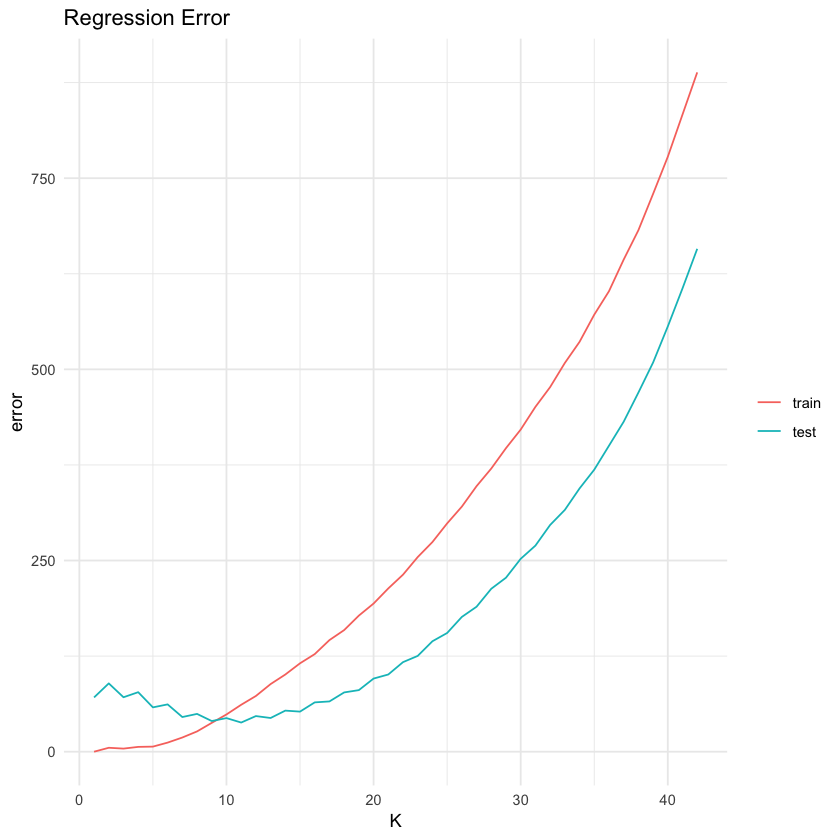

In [27]:
# Plot training and testing error in relation to log(1/K)
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Regression Error")


### Findings

My findings are as follows:
- The optimum value of K is 11 because it seems to be the most ideal balance between the training error (61.361702) and the test error (38.12096). It is the point where the testing error is lowest before it increases as K increases. K below 11 overfits the training data and performs poorly in the test dataset. K above that underfits both the training data and test data. 
- In general, as K increases, the complexity of the KNN classifier increases too. As K increases, the training error increases. This is so because a model which is less complex tends to overfit the training dataset and performs poorly when it used on the test set.  As K increases, the testing error decreases until it reaches a mininum and begins to increase as the model becomes too general and fits poorly with the data (Singh, 2018). 

Reference: 

Sing, A. (2018). A Practical Introduction to K-Nearest Neighbor for Regression. Analytics Vidhya. Retrieved 20 April 2019, from https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/